In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets
import sklearn.ensemble

plt.style.use('ggplot')

In [2]:
housing = pd.read_csv('./data/Ames_HousePrice_withAddress_cleaned.csv')
housing.drop(['Unnamed: 0'], axis=1, inplace=True)


In [3]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
#dir(sklearn.ensemble)

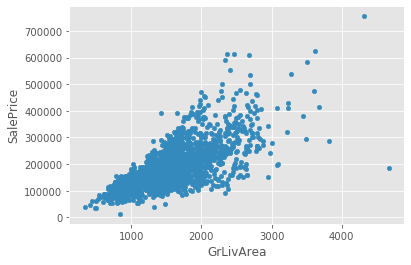

In [4]:
housing.plot.scatter(x='GrLivArea', y='SalePrice')

In [5]:
housing = housing[(housing['GrLivArea'] <= 4500) & (housing['SalePrice'] < 600000)]

In [6]:
#sns.pairplot(housing)

In [7]:
X = housing[['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
            'YearBuilt', 'ExterQual', 'BsmtFinSF1', 
            'TotalBsmtSF','KitchenAbvGr', 'KitchenQual','Fireplaces', 'GarageArea', 
            'ScreenPorch','Class_2story_dev', 'Class_duplex','Lot_CulDSac', 'Foundation_Concrete']]

y = np.log(housing['SalePrice'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X.isna().sum()

GrLivArea              0
LotFrontage            0
LotArea                0
OverallQual            0
OverallCond            0
YearBuilt              0
ExterQual              0
BsmtFinSF1             1
TotalBsmtSF            1
KitchenAbvGr           0
KitchenQual            0
Fireplaces             0
GarageArea             1
ScreenPorch            0
Class_2story_dev       0
Class_duplex           0
Lot_CulDSac            0
Foundation_Concrete    0
dtype: int64

In [10]:
y.isna().sum()

0

In [11]:
X_train = X_train.fillna(X_train.mean())
X_test  = X_test.fillna(X_test.mean())

X = X.fillna(X.mean())

In [12]:
gbm = GradientBoostingRegressor()

In [13]:
gbm.fit(X_train,y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test, y_test)))

--------------------------------------------------
The train set R^2 is 0.947
The test set R^2 is 0.907


In [14]:
model = gbm.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
# from sklearn.metrics import r2_score
# r2_score(y_pred, y_test)

# Last look at parameters


In [16]:
gbm.set_params(learning_rate=0.1, n_estimators=1000, max_depth=2, max_features=3, subsample=0.9, warm_start=False)
gbm.fit(X_train,y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test, y_test)))

--------------------------------------------------
The train set R^2 is 0.959
The test set R^2 is 0.920


In [17]:
from sklearn.metrics import r2_score

gen_train = gbm.staged_predict(X_train)
gen_test  = gbm.staged_predict(X_test)

trainR2 = []
testR2  = []
steps   = range(1,1000)
for n in steps:
    y_pred_train = next(gen_train)
    y_pred_test  = next(gen_test)
    trainR2.append(r2_score(y_pred_train, y_train))
    testR2.append(r2_score(y_pred_test, y_test))

Text(0, 0.5, '$R^2$')

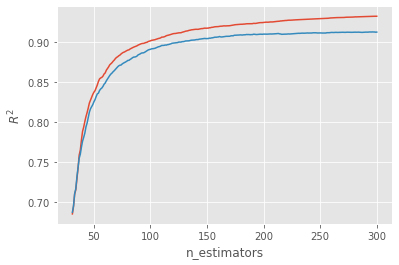

In [18]:
start = 30
end   = 300
plt.plot(steps[start:end], trainR2[start:end],label='train')
plt.plot(steps[start:end], testR2[start:end],label='test')
plt.xlabel('n_estimators')
plt.ylabel(r'$R^2$')

In [19]:
# LR = {'n_estimators':[70, 75, 80, 90, 100, 125, 150, 250, 300], \
#       'max_depth':[1,2,3,4,5], 'max_features': [1, 2, 3, 4, 5]}

# tuning = GridSearchCV(estimator = GradientBoostingRegressor(),
#                      param_grid = LR, scoring = 'r2')

# tuning.fit(X_train, y_train)
# tuning.best_params_, tuning.best_score_

In [20]:
gbm.set_params(learning_rate=0.09, n_estimators=500, max_depth=2, max_features=3, subsample=.9, warm_start=False)
gbm.fit(X_train, y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test, y_test)))

--------------------------------------------------
The train set R^2 is 0.945
The test set R^2 is 0.923


In [21]:
from sklearn.metrics import r2_score

gen_train = gbm.staged_predict(X_train)
gen_test  = gbm.staged_predict(X_test)

trainR2 = []
testR2  = []
steps   = range(1,500)
for n in steps:
    y_pred_train = next(gen_train)
    y_pred_test  = next(gen_test)
    trainR2.append(r2_score(y_pred_train, y_train))
    testR2.append(r2_score(y_pred_test, y_test))

Text(0, 0.5, '$R^2$')

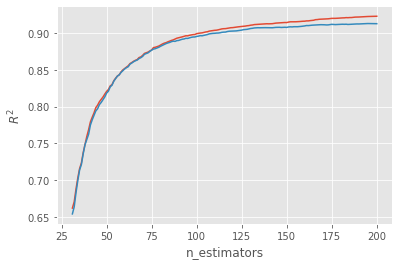

In [22]:
start = 30
end   = 200
plt.plot(steps[start:end], trainR2[start:end],label='train')
plt.plot(steps[start:end], testR2[start:end],label='test')
plt.xlabel('n_estimators')
plt.ylabel(r'$R^2$')

In [23]:
gbm.set_params(learning_rate=0.09, n_estimators=100, max_depth=2, max_features=3, subsample=.9, warm_start=False)
gbm.fit(X_train, y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test, y_test)))

--------------------------------------------------
The train set R^2 is 0.916
The test set R^2 is 0.909


In [24]:
gbm.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.09, loss='ls', max_depth=2,
                          max_features=3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
gbm.score(X, y)

0.9111467323432128

In [26]:
importance = sorted(list(zip(X.columns, list(gbm.feature_importances_))), key=lambda t:t[1], reverse=True)

Text(0.5, 1.0, 'feature importance of a gbm classifier')

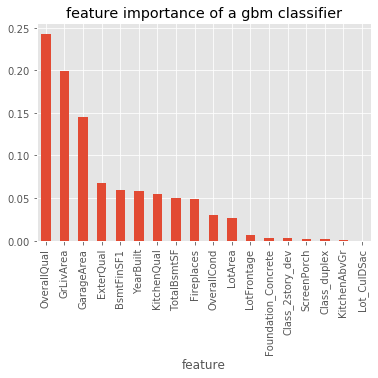

In [27]:
a, b = zip(*importance)
importance_score = pd.DataFrame({'feature':a, 'score':b})
importance_score.plot.bar(x='feature', y='score', legend=None)
plt.title('feature importance of a gbm classifier')